**Multi-layer perception** is also known as MLP. It is fully connected dense layers, which transform any input dimension to the desired dimension. A multi-layer perception is a neural network that has multiple layers. 

A multi-layer perceptron has one input layer and for each input, there is one neuron(or node), it has one output layer with a single node for each output and it can have any number of hidden layers and each hidden layer can have any number of nodes. A schematic diagram of a Multi-Layer Perceptron (MLP) is depicted below.

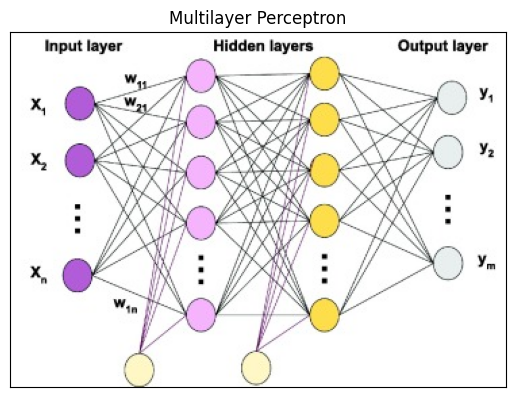

In [88]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Images/multilayer_perceptron.jpg')
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.title("Multilayer Perceptron")
plt.show()

Every node in the multi-layer perception uses a sigmoid activation function. The sigmoid activation function takes real values as input and converts them to numbers between 0 and 1 using the sigmoid formula.

`(x) = 1/(1+exp(-x))`

#### Imports

In [89]:
import tensorflow as tf
import numpy as np
# Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation

In [90]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("pixel data of first image")
X_train[:,:, 0]

pixel data of first image


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [108]:
# cast the records into float values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the pixel values (divide by 255)
grayscale = 255
X_train /= grayscale
X_test /= grayscale
X_train[0,:,:].shape

(28, 28)

We are converting the pixel values into floating-point values to make the predictions. Changing the numbers into grayscale values will be beneficial as the values become small and the computation becomes easier and faster. As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1

In [92]:
print("Feature matrix:", X_train.shape) 
print("Target matrix:", X_test.shape) 
print("Feature matrix:", y_train.shape) 
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


Thus we get that we have 60,000 records in the training dataset and 10,000 records in the test dataset and Every image in the dataset is of the size 28×28.

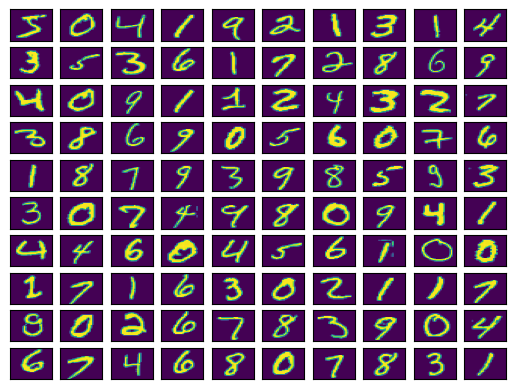

In [93]:
# visualize them
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(X_train[k].reshape(28, 28), aspect='auto')
        ax[i][j].axes.get_xaxis().set_visible(False)
        ax[i][j].axes.get_yaxis().set_visible(False)
        k+=1
plt.show()

In [94]:
# TEST DATA
# plt.imshow(X_test[0].reshape(28, 28))
# plt.show()

MODEL

In [95]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='sigmoid') # Output
])

C:\Users\harin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Some important points to note:**

* **The Sequential model** allows us to create models layer-by-layer as we need in a multi-layer perceptron and is limited to single-input, single-output stacks of layers.
* **Flatten** flattens the input provided without affecting the batch size. For example, If inputs are shaped (batch_size,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch_size, 1).
* **Activation** is for using the sigmoid activation function.
* The **first two Dense** layers are used to make a fully connected model and are the hidden layers.
* The **last Dense layer** is the output layer which contains 10 neurons that decide which category the image belongs to.

In [96]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Compile function is used here that involves the use of loss, optimizers, and metrics. 

**Some important points to note:**

* **Epochs** tell us the number of times the model will be trained in forwarding and backward passes.
* **Batch Size** represents the number of samples, If it’s unspecified, batch_size will default to 32.
* **Validation** Split is a float value between 0 and 1. The model will set apart this fraction of the training data to evaluate the loss and any model metrics at the end of each epoch. (The model will not be trained on this data)

In [97]:
model.fit(X_train, y_train, epochs=10, batch_size=200, validation_split=0.2)

Epoch 1/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8213 - loss: 0.6447 - val_accuracy: 0.9560 - val_loss: 0.1588
Epoch 2/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9563 - loss: 0.1457 - val_accuracy: 0.9663 - val_loss: 0.1129
Epoch 3/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9733 - loss: 0.0923 - val_accuracy: 0.9721 - val_loss: 0.0942
Epoch 4/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9820 - loss: 0.0601 - val_accuracy: 0.9722 - val_loss: 0.0923
Epoch 5/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9862 - loss: 0.0463 - val_accuracy: 0.9745 - val_loss: 0.0865
Epoch 6/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9890 - loss: 0.0375 - val_accuracy: 0.9766 - val_loss: 0.0822
Epoch 7/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9921 - loss: 0.0267 - val_accuracy: 0.9762 - val_loss: 0.0847
Epoch 8/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9942 - loss: 0.0198 - val_accuracy: 0.

In [98]:
result = model.evaluate(X_test, y_test, verbose=0)
print('Test loss, Test Acc: ', result)

Test loss, Test Acc:  [0.07837698608636856, 0.9812999963760376]


In [99]:
preds = model.predict(X_test)
len(preds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


10000

In [106]:
preds_class = np.argmax(preds, axis=1)
correct_preds = (preds_class==y_test)
print(f"Number of correct predictions: {np.sum(correct_preds)}/{len(X_test)}")

Number of correct predictions: 9812/10000


fig1 => Actual: 7, Predicted: 7
fig2 => Actual: 2, Predicted: 2
fig3 => Actual: 1, Predicted: 1
fig4 => Actual: 0, Predicted: 0
fig5 => Actual: 4, Predicted: 4
fig6 => Actual: 1, Predicted: 1
fig7 => Actual: 4, Predicted: 4
fig8 => Actual: 9, Predicted: 9
fig9 => Actual: 5, Predicted: 5
fig10 => Actual: 9, Predicted: 9


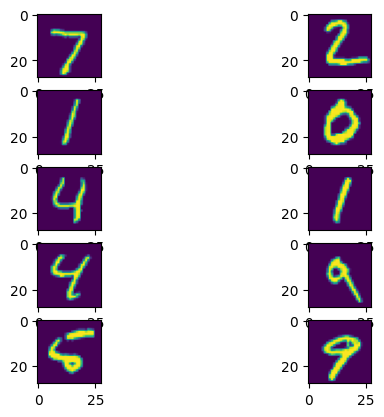

In [101]:
fig, ax = plt.subplots(5, 2)
k = 0
for i in range(5):
    for j in range(2):
        ax[i][j].imshow(X_test[k].reshape(28, 28))
        print(f"fig{k+1} => Actual: {y_test[k]}, Predicted: {preds_class[k]}")
        k+=1
plt.show()

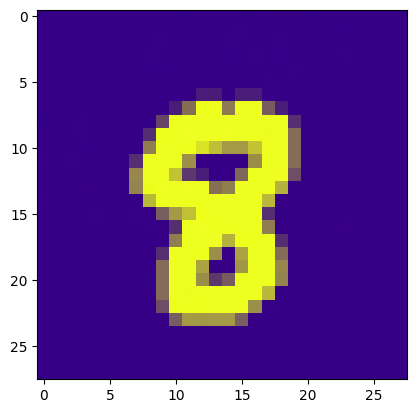

In [132]:
img = mpimg.imread('Images/test_image3.jpg')
plt.imshow(img)
plt.show()

In [133]:
img_gray = img.astype('float32') # converting to gray
img_gray /= 255.0 # Normalize values
# You can average the three color channels (Red, Green, Blue) to obtain a grayscale value:
img_gray = np.mean(img_gray, axis=2) # (28, 28, 3) --> (28, 28)
img_gray.shape

(28, 28)

In [134]:
img_gray = img_gray.reshape(1, 28, 28)
img_gray.shape

(1, 28, 28)

* `np.argmax`: This function from NumPy returns the indices of the maximum values along the specified axis. In this case, it finds the index of the highest probability for each sample.

* `axis=1`: This specifies that you want to look along the rows of the array. Each row corresponds to a different sample, and you want to get the index of the class with the highest probability for each sample.

In [138]:
test_pred = model.predict(img_gray)
# print("Probabilities of each class(1-10): ", test_pred)
test_pred_class = np.argmax(test_pred, axis=1)
print("Predicted Value: ",test_pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Value:  [8]
